In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
current_time = datetime.now()

# Format the time as "Hour:Minute AM/PM"
formatted_time = current_time.strftime("%I:%M %p")

print("Formatted time:", formatted_time)


Formatted time: 11:23 AM


In [3]:
# read
# n_LF, n_HF, rel_error = np.loadtxt('error_function_11P_MF-Box.txt', unpack=True, usecols=(0,1,2))
n_LF, n_HF, rel_error = np.loadtxt('error_function_goku_pre_frontera.txt', unpack=True, usecols=(0,1,2))

In [4]:
rel_error.shape

(2673,)

In [5]:
def grid_error(n_LF, n_HF, rel_error, n_LF_max = 270, n_HF_max = 9, len_slice = 3):
    X_grid = int(n_LF_max / len_slice)
    Y_grid = int(n_HF_max / len_slice)
    grid_error = np.ones((X_grid, Y_grid))
    n_sample = np.ones((X_grid, Y_grid))
    x = n_HF/len_slice
    y = n_LF/len_slice
    for i in range(len(x)):
        i_y = int(x[i]) - 1
        i_x = int(y[i]) - 1
        if grid_error[i_x, i_y] != 1:
            grid_error[i_x, i_y] += rel_error[i]
            n_sample[i_x, i_y] += 1
        else:
            grid_error[i_x, i_y] = rel_error[i]

    grid_error = grid_error/n_sample
    return grid_error

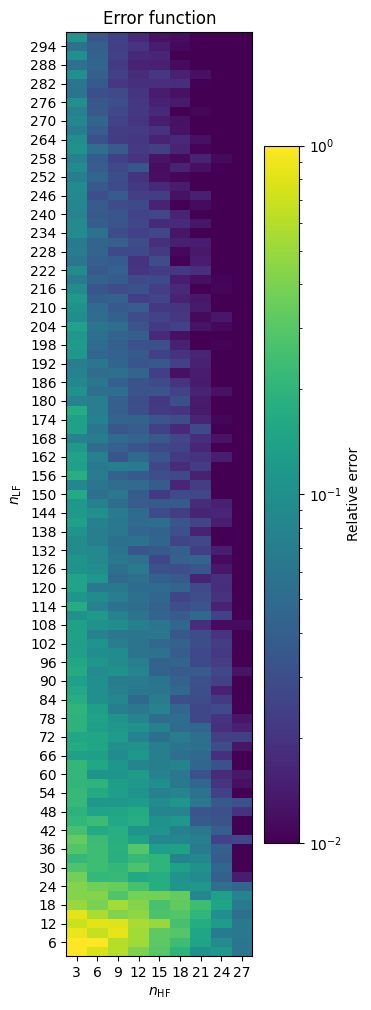

In [6]:
n_LF_max = 297
n_HF_max = 27
len_slice = 3

y = np.linspace(len_slice, n_LF_max, n_LF_max//len_slice)  # Replace with your desired range and resolution
x = np.linspace(len_slice, n_HF_max, n_HF_max//len_slice)  # Replace with your desired range and resolution
X, Y = np.meshgrid(x, y)

# create griddata
Z = grid_error(n_LF, n_HF, rel_error, len_slice=len_slice, n_LF_max=n_LF_max, n_HF_max=n_HF_max)

# Create a colormap to map function values to colors
cmap = plt.get_cmap('viridis')
vmin = 1e-2
vmax = 1

# Create a plot
plt.figure(figsize=(3, 12))
plt.pcolormesh(X, Y, Z, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(label='Relative error')
plt.title('Error function')
plt.xlabel(r'$n_\mathrm{HF}$')
plt.ylabel(r'$n_\mathrm{LF}$')
xticks = np.arange(3, n_HF_max + 1, 3)
plt.xticks(xticks)
y_ticks = np.arange(6, n_LF_max + 1, 6)
plt.yticks(y_ticks)
plt.show()


In [7]:
Z.shape

(99, 9)

In [8]:
X.shape

(99, 9)

In [9]:
pairs_done = []
for row in range(Z.shape[0]):
    for col in range(Z.shape[1]):
        if Z[row, col] != 1:
            pairs_done.append([3*(row+1), 3*(col+1)])
            

In [10]:
len(pairs_done)

891

In [11]:
pairs_done

[[3, 3],
 [3, 6],
 [3, 9],
 [3, 12],
 [3, 15],
 [3, 18],
 [3, 21],
 [3, 24],
 [3, 27],
 [6, 3],
 [6, 6],
 [6, 9],
 [6, 12],
 [6, 15],
 [6, 18],
 [6, 21],
 [6, 24],
 [6, 27],
 [9, 3],
 [9, 6],
 [9, 9],
 [9, 12],
 [9, 15],
 [9, 18],
 [9, 21],
 [9, 24],
 [9, 27],
 [12, 3],
 [12, 6],
 [12, 9],
 [12, 12],
 [12, 15],
 [12, 18],
 [12, 21],
 [12, 24],
 [12, 27],
 [15, 3],
 [15, 6],
 [15, 9],
 [15, 12],
 [15, 15],
 [15, 18],
 [15, 21],
 [15, 24],
 [15, 27],
 [18, 3],
 [18, 6],
 [18, 9],
 [18, 12],
 [18, 15],
 [18, 18],
 [18, 21],
 [18, 24],
 [18, 27],
 [21, 3],
 [21, 6],
 [21, 9],
 [21, 12],
 [21, 15],
 [21, 18],
 [21, 21],
 [21, 24],
 [21, 27],
 [24, 3],
 [24, 6],
 [24, 9],
 [24, 12],
 [24, 15],
 [24, 18],
 [24, 21],
 [24, 24],
 [24, 27],
 [27, 3],
 [27, 6],
 [27, 9],
 [27, 12],
 [27, 15],
 [27, 18],
 [27, 21],
 [27, 24],
 [27, 27],
 [30, 3],
 [30, 6],
 [30, 9],
 [30, 12],
 [30, 15],
 [30, 18],
 [30, 21],
 [30, 24],
 [30, 27],
 [33, 3],
 [33, 6],
 [33, 9],
 [33, 12],
 [33, 15],
 [33, 18],
 [33

In [12]:
def get_pairs_done(output_file):
    pairs_done = np.loadtxt(output_file, usecols=(0,1))
    return pairs_done

In [13]:
pairs_done = get_pairs_done('error_function.txt')

In [14]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [15]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [16]:
np.where(3 == pairs_done[:,0])

(array([305, 307, 310, 315, 321, 322, 540, 541, 546, 612, 983, 984]),)

In [17]:
X

array([[ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 3.,  6.,  9., 12., 

In [18]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 1.98 * 4
#     rho = .74
#     beta_L = .73 * 1.
#     beta_H = .39 * 2
#     alpha = .37 * 50
#     beta_H2 = 1.5 * 2
#     return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))

In [19]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 9.998
#     rho = 35.864
#     beta_L = 0.834	
#     beta_H = 1.935
#     alpha_2 = 30.125
#     beta_H2 = 6.722
#     alpha_1 = 41.238

#     sigma_lg_Phi = 0.223   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * (n_HF**(beta_H) + alpha_1)) + 1 / (alpha_2 + n_HF**(beta_H2))))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [20]:
# # define the error function 1
# def error_function(n_LF, n_HF):
#     eta = 8.904
#     rho = 118.144
#     beta_L = 2.290	
#     rho_H = 2.047
#     alpha_2 = 70.668
#     beta_H2 = 2.337
#     # alpha_1 = 41.238

#     sigma_lg_Phi = 0.242   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / (n_LF + rho_H * n_HF)**(beta_L)) + 1 / (alpha_2 + n_HF**(beta_H2)))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [166]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):
    eta = 11.20294568777112
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 34422.595850790254
    beta_L = 1.1406839520015446
    beta_H = 4.145389781446169
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 2.713544143928366
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 7.8176404049598816
    alpha_1 = 18.553167013696203
    alpha_2 = 7.5153891398955235

    sigma_lg_Phi = 0.21450697746101002   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return mean_Phi

In [167]:
# # define the error function 2 param means
# def error_function(n_LF, n_HF):
#     eta = 11.083	
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 50770.415	
#     beta_L = 1.142
#     beta_H = 4.141
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 2.795	
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 8.416
#     alpha_1 = 18.457	
#     alpha_2 = 7.975

#     sigma_lg_Phi = 0.215		   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [168]:
# # define the error function 2 param means
# def error_function(n_LF, n_HF):
#     eta = 11.071
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 51239.078	
#     beta_L = 1.141
#     beta_H = 4.144
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 2.799
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 8.398
#     alpha_1 = 18.479
#     alpha_2 = 8.016	

#     sigma_lg_Phi = 0.215		   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [169]:
# # define the error function 3
# def error_function(n_LF, n_HF):
#     eta = 10.172	
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 63.564
#     beta_L = 2.240
#     beta_H = 2.937
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 2.209
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = -0.869	
#     # alpha_1 = 9.614
#     alpha_2 = 4.852

#     sigma_lg_Phi = 0.250	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF)**beta_H * (n_LF + alpha_L)**(beta_L-beta_H) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [170]:
# # define the error function
# def error_function(n_LF, n_HF):
#     eta = 10.000	
#     rho = 136.554
#     beta_L = 1.037
#     beta_H = 2.013
#     alpha_2 = 5.073
#     beta_H2 = 6.383
#     alpha_1 = 55.954
#     alpha_L = 11.465	

#     sigma_lg_Phi = 0.218   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10((rho / ((n_LF**(beta_L) + alpha_L) * (n_HF**(beta_H) + alpha_1)) + 1 / (alpha_2 + n_HF**(beta_H2))))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [171]:
# # define the error function 5
# def error_function(n_LF, n_HF):
#     eta = 9.844
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 4735.934
#     beta_L = 1.435
#     beta_H = 2.933
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     beta_H2 = 6.001
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 36.815
#     alpha_1 = 57.329
#     alpha_2 = 5.147

#     sigma_lg_Phi = 0.219	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF**(beta_L-1) + alpha_L) * (n_HF**(beta_H-1) + alpha_1) ) + 1 / (alpha_2 + n_HF**(beta_H2)))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [172]:
# # define the error function 6
# def error_function(n_LF, n_HF):
#     eta = 9.877
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 4763.987
#     beta_L = 1.406
#     beta_H = 2.948	
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     # beta_H2 = 6.001
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 37.023	
#     alpha_1 = 57.329
#     # alpha_2 = 5.147

#     sigma_lg_Phi = 0.219	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF**(beta_L-1) + alpha_L) * (n_HF**(beta_H-1) + alpha_1) ) )
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

In [173]:
# # define the error function 7 par means
# def error_function(n_LF, n_HF):
#     eta = 9.931		
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 2012220.420
#     beta_L = 1.115
#     beta_H = 4.935
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     # beta_H2 = 3.486
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 28.265	
#     alpha_1 = 25.809	
#     alpha_2 = 3.477

#     sigma_lg_Phi = 0.213	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return median_Phi

In [174]:
error_function(500,22)

0.004338616999316913

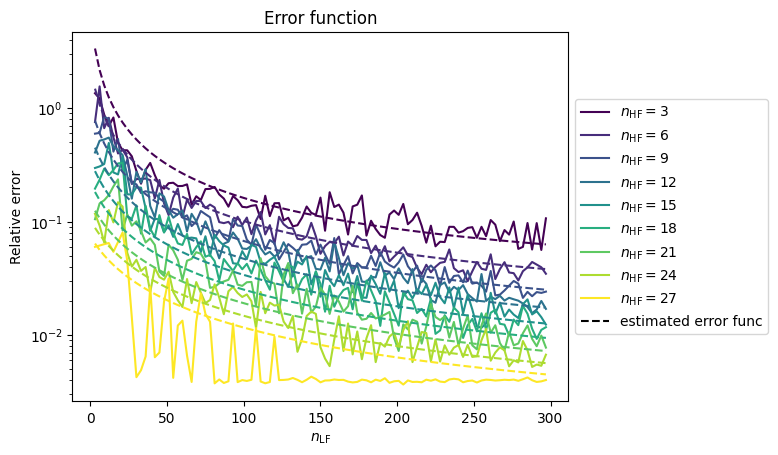

In [175]:
# distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(X[0])))

# plot the error function as curves
for i in range(len(X[0])):
    plt.plot(Y[:,0], Z[:, i], color=colors[i],label=r'$n_\mathrm{HF}=$' + str(int(X[0, i])))
# plot the error function as curves for different n_HF
for i in range(len(X[0])):
    plt.plot(Y[:,0], error_function(Y[:,0], X[0,i]), '--', color=colors[i])

plt.plot([],[], 'k--', label='estimated error func')
# adjust the legend location to outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()
plt.yscale('log')
# plt.ylim(1e-3, 2)
plt.xlabel(r'$n_\mathrm{LF}$')
plt.ylabel('Relative error')
plt.title('Error function')
plt.show()

In [176]:
# define the error function
def error_function_pro(n_LF, n_HF):
    eta = 2.40753963 * 240
    rho = .01
    beta_L = 1.65417569 * .63
    beta_H = 0.69595906 * 3.1
    alpha_2 = 10300
    beta_H2 = 0.69595906 * 8.5
    rho_2 = 0.7
    return eta * (rho / (rho_2*n_LF**(beta_L) + (1-rho_2)*n_HF**(beta_H)) + (1-rho)/(alpha_2 + n_HF**(beta_H2)))

In [177]:
error_function_pro(270, 37)

0.005991055826827262

In [179]:
50 / 0.6071794871794871

82.34797297297298

In [181]:
scales = np.array([0.24604398749055229,0.25037135054551984,0.25474209540377196,0.25915659169639615,0.26361522418524325,0.26811839320369985,0.27266651538072756,0.2772600240845024,0.28189937017015915,0.28658502253027396,0.2913174687998711,0.2960972160603771,0.3009247915500195,0.30580074336122504,0.31072564130477726,0.3157000776702719,0.3207246680529438,0.32580005225792613,0.33092689520157287,0.3361058878459307,0.3413377482145443,0.34662322240529636,0.35196308562427614,0.357358143418183,0.36280923267221393,0.3683172230110251,0.37388301790956313,0.37950755611956033,0.3851918130372261,0.3909368021347047,0.3967435764761366,0.4026132303143203,0.40854690075169614,0.4145457694742996,0.4206110645721772,0.4267440624485821,0.4329460898187082,0.4392185258022749,0.4455628041294155,0.45198041546972256,0.4584729098390967,0.4650418991425019,0.4716890599190048,0.4784161360725652,0.4852249419516488,0.4921173653756454,0.4990953710466948,0.506161003913468,0.5133163929555232,0.5205637549893686,0.5279053987711052,0.5353437293637489,0.5428812526941305,0.55052058038207,0.5582644348910851,0.5661156549672538,0.5740772014017073,0.5821521631478683,0.5903437638178551,0.5986553685854419,0.6070904915259517,0.6156528034264831,0.6243461401030492,0.6331745112645549,0.6421421099671623,0.6512533227065193,0.6605127401996344,0.6699251689129199,0.6794956433871234,0.689229439440376,0.6991320883556897,0.7092093920664165,0.719467439480242,0.7299126240155382,0.7405516624587363,0.7513916153824755,0.7624399090441077,0.7737043589376108,0.7851931957161781,0.796915092444748,0.8088791950046782,0.8210951543621201,0.8335731620058927,0.846323988411641,0.8593590246916077])
distances = np.array([4674.910817, 4624.91098, 4574.91115, 4524.911328, 4474.911514, 4424.911707, 4374.911909, 4324.91212, 4274.912339, 4224.912567, 4174.912805, 4124.913053, 4074.91331, 4024.913578, 3974.913856, 3924.914145, 3874.914445, 3824.914757, 3774.915081, 3724.915417, 3674.915765, 3624.916126, 3574.916501, 3524.916889, 3474.917291, 3424.917707, 3374.918138, 3324.918584, 3274.919045, 3224.919522, 3174.920015, 3124.920524, 3074.921051, 3024.921595, 2974.922156, 2924.922735, 2874.923333, 2824.92395, 2774.924586, 2724.925242, 2674.925918, 2624.926614, 2574.927331, 2524.928069, 2474.928829, 2424.929611, 2374.930415, 2324.931242, 2274.932093, 2224.932966, 2174.933864, 2124.934786, 2074.935733, 2024.936705, 1974.937702, 1924.938725, 1874.939774, 1824.94085, 1774.941952, 1724.943082, 1674.944238, 1624.945422, 1574.946635, 1524.947875, 1474.949144, 1424.950442, 1374.951768, 1324.953124, 1274.954509, 1224.955923, 1174.957368, 1124.958842, 1074.960346, 1024.96188, 974.963445, 924.96504, 874.966665, 824.968321, 774.970007, 724.971724, 674.973471, 624.975249, 574.977057, 524.978896, 474.980765])

In [182]:
len(scales)

85

In [183]:
len(distances)

85